# Get the data

In [1]:
import pandas as pd

eda = pd.read_csv("eda.csv") # MACA058722019  CORE END PLATE SCREEN EE TEMP (TG369A)

In [2]:
eda.head()

,ID,EventDateTime,Shelved,ConvertedDateTime,SEQ,SourceEventTime,Tag,TagDescription,PlantArea,Category,StatusValue,PVPriority,AlarmChgStr,PLIN,AlarmAction,PV_ProcessVariable,ENU,NOP
0,1,2017-03-01 02:37:01.000,42795.10904,2017-03-01 02:37:01.000,NaN,MACA058722019RTN,MACA058722019,CORE END PLATE SCREEN EE TEMP (TG369A),Unit 1,1,0,3,CLEAR,38360,RTN,-39.856937,degC,1
1,26,2017-03-01 02:39:00.000,42795.11042,2017-03-01 02:39:00.000,MACA058722019ALM_MACPA_CLR_SNICHRNA_SEQ2019ALM...,MACA058722019ALM,MACA058722019,CORE END PLATE SCREEN EE TEMP (TG369A),Unit 1,1,4,3,HIGH,38360,ALM,393.169950,degC,1
2,27,2017-03-01 02:39:00.000,42795.11042,2017-03-01 02:39:00.000,MACA058722019ALM_MACA058722019ALM_MACPA_CLR_SN...,MACA058722019ALM,MACA058722019,CORE END PLATE SCREEN EE TEMP (TG369A),Unit 1,1,3,3,VHIGH,38360,ALM,393.169950,degC,1
3,45,2017-03-01 02:41:01.000,42795.11182,2017-03-01 02:41:01.000,MACA058722019ALM_MACA007642019RTN_MACA04919201...,MACA058722019ALM,MACA058722019,CORE END PLATE SCREEN EE TEMP (TG369A),Unit 1,1,4,3,HIGH,38360,ALM,117.099620,degC,1
4,47,2017-03-01 02:41:30.000,42795.11215,2017-03-01 02:41:30.000,MACA058722019RTN_MACA6_3082019ALM_MACA05872201...,MACA058722019RTN,MACA058722019,CORE END PLATE SCREEN EE TEMP (TG369A),Unit 1,1,0,3,CLEAR,38360,RTN,-112.643560,degC,1


In [3]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50323 entries, 0 to 50322
Data columns (total 18 columns):
ID                    50323 non-null int64
EventDateTime         50323 non-null object
Shelved               50323 non-null float64
ConvertedDateTime     50323 non-null object
SEQ                   50322 non-null object
SourceEventTime       50323 non-null object
Tag                   50323 non-null object
TagDescription        50323 non-null object
PlantArea             50323 non-null object
Category              50323 non-null int64
StatusValue           50323 non-null int64
PVPriority            50323 non-null int64
AlarmChgStr           50323 non-null object
PLIN                  50323 non-null int64
AlarmAction           50323 non-null object
PV_ProcessVariable    50323 non-null float64
ENU                   50323 non-null object
NOP                   50323 non-null int64
dtypes: float64(2), int64(6), object(10)
memory usage: 6.9+ MB


In [4]:
eda["AlarmChgStr"].value_counts()

HIGH          25161
VHIGH         12602
CLEAR         12560
Name: AlarmChgStr, dtype: int64

In [5]:
eda.describe()

,ID,Shelved,Category,StatusValue,PVPriority,PLIN,PV_ProcessVariable,NOP
count,5.032300e+04,50323.000000,50323.000000,50323.000000,50323.0,50323.0,50323.000000,50323.0
mean,5.631105e+05,42794.327142,15.460783,2.751227,3.0,38360.0,117.965145,1.0
std,3.072388e+05,6.959813,9.159397,1.638427,0.0,0.0,165.764356,0.0
min,1.000000e+00,42789.030500,1.000000,0.000000,3.0,38360.0,-247.946300,1.0
25%,2.972635e+05,42789.030500,7.000000,3.000000,3.0,38360.0,-2.665970,1.0
50%,5.982210e+05,42789.030500,15.000000,3.000000,3.0,38360.0,121.123050,1.0
75%,8.355975e+05,42803.129110,24.000000,4.000000,3.0,38360.0,255.115740,1.0
max,1.048524e+06,42807.143170,31.000000,4.000000,3.0,38360.0,399.939480,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109970940>,
      dtype=object)

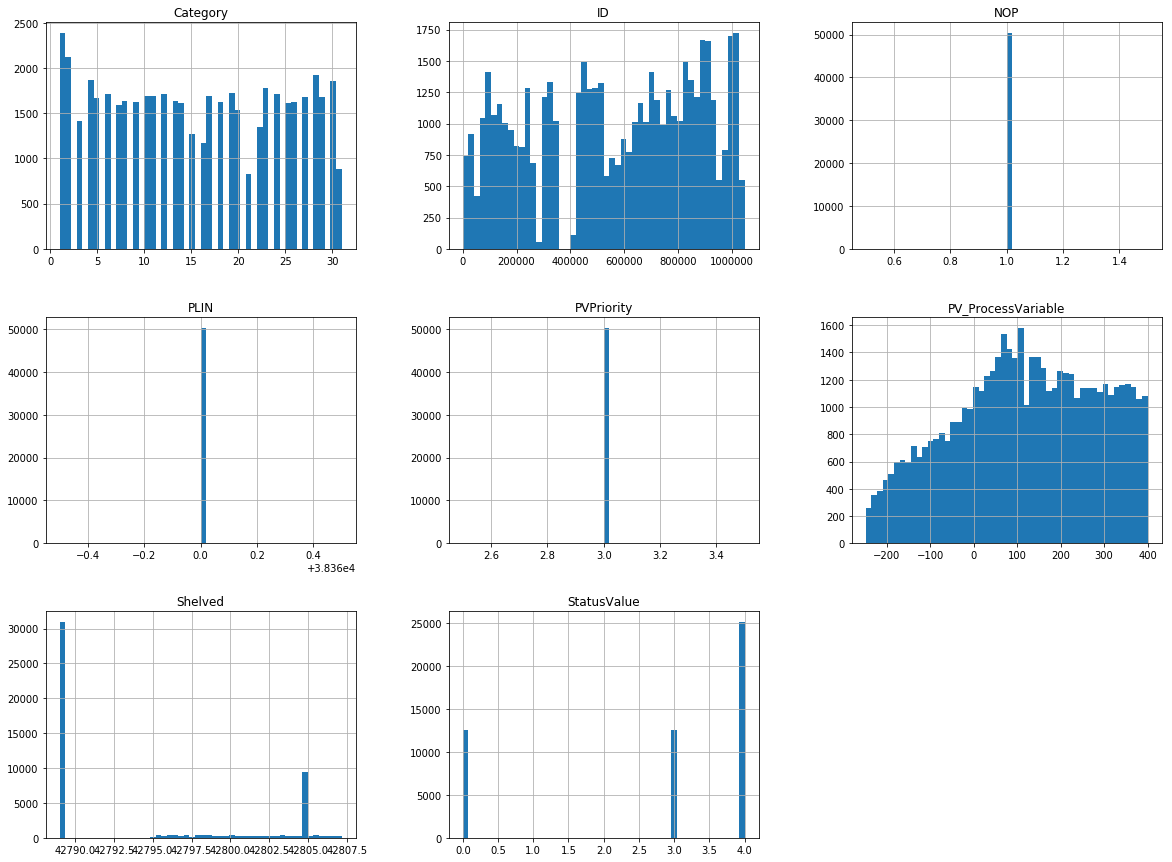

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
eda.hist(bins=50, figsize=(20,15))

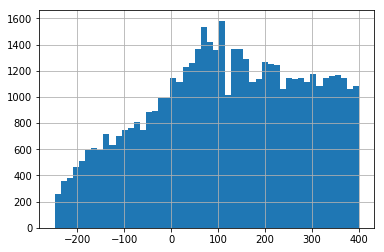

In [7]:
eda["PV_ProcessVariable"].hist(bins=50)

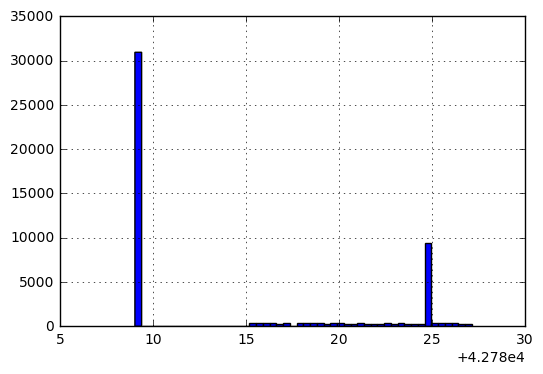

In [71]:
eda["Shelved"].hist(bins=50)

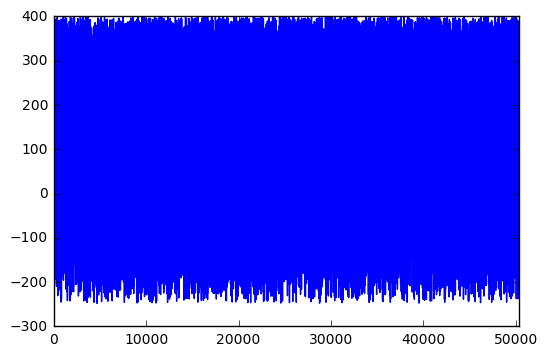

In [72]:
eda["PV_ProcessVariable"].plot()

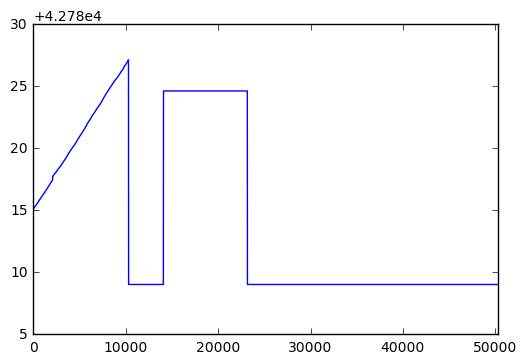

In [73]:
eda["Shelved"].plot()

In [74]:
eda[0:2]["PV_ProcessVariable"]

0    -39.856937
1    393.169950
Name: PV_ProcessVariable, dtype: float64

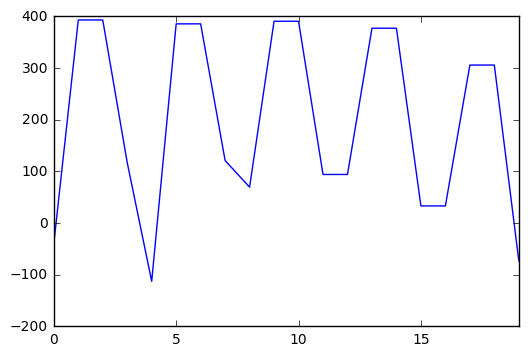

In [75]:
eda[0:20]["PV_ProcessVariable"].plot()

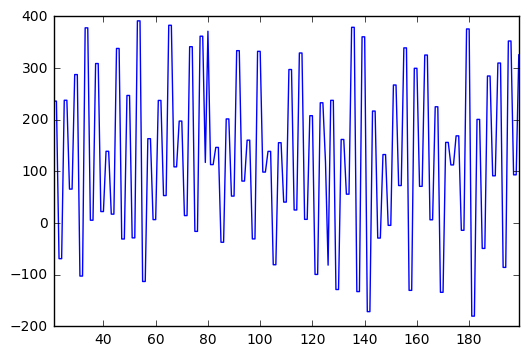

In [76]:
eda[21:200]["PV_ProcessVariable"].plot()

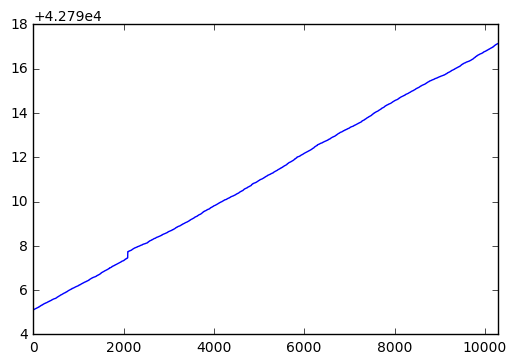

In [77]:
eda[:10300]["Shelved"].plot()

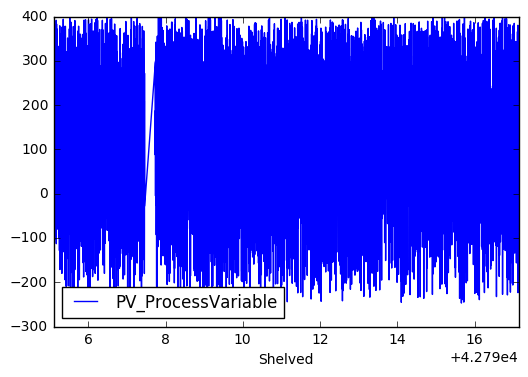

In [78]:
eda[:10300].plot(kind="line", x="Shelved", y="PV_ProcessVariable")

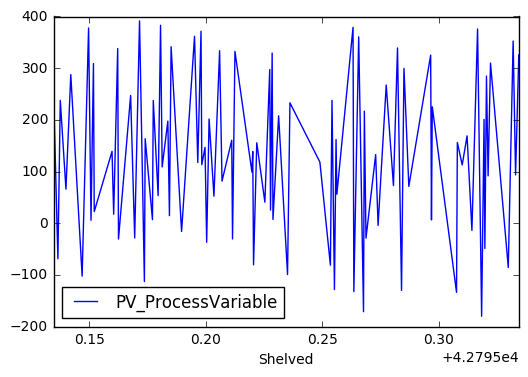

In [79]:
eda[21:200].plot(kind="line", x="Shelved", y="PV_ProcessVariable")

In [80]:
import numpy as np

# to make this notebook's output identical at every run
np.random.seed(42)

In [13]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_set = split_train_test(eda, 0.2)
print(len(train_set), "train +", len(test_set), "test")

40259 train + 10064 test


In [15]:
test_set.head()

,ID,EventDateTime,Shelved,ConvertedDateTime,SEQ,SourceEventTime,Tag,TagDescription,PlantArea,Category,StatusValue,PVPriority,AlarmChgStr,PLIN,AlarmAction,PV_ProcessVariable,ENU,NOP
30238,703112,2017-02-23 00:43:55.000,42789.03050,2017-02-23 00:43:55.000,MACA058722019ALM_MACA058722019ALM_MACA00756201...,MACA058722019ALM,MACA058722019,CORE END PLATE SCREEN EE TEMP (TG369A),Unit 1,7,3,3,VHIGH,38360,ALM,309.68558,degC,1
6890,149072,2017-03-09 05:10:24.000,42803.21556,2017-03-09 05:10:24.000,MACA058722019ALM_MACA058722019ALM_MACA17_03232...,MACA058722019ALM,MACA058722019,CORE END PLATE SCREEN EE TEMP (TG369A),Unit 1,9,3,3,VHIGH,38360,ALM,200.87599,degC,1
27201,646941,2017-02-23 00:43:55.000,42789.03050,2017-02-23 00:43:55.000,MACA058722019ALM_MACCMNSRV_MCN_SBSTPWRN2019RTN...,MACA058722019ALM,MACA058722019,CORE END PLATE SCREEN EE TEMP (TG369A),Unit 1,4,4,3,HIGH,38360,ALM,118.09034,degC,1
22325,519024,2017-03-10 15:16:57.000,42804.63677,2017-03-10 15:16:57.000,MACA058722019ALM_MACA12_2922019ALM_MACA6_44620...,MACA058722019ALM,MACA058722019,CORE END PLATE SCREEN EE TEMP (TG369A),Unit 1,29,4,3,HIGH,38360,ALM,280.12308,degC,1
34138,772884,2017-02-23 00:43:55.000,42789.03050,2017-02-23 00:43:55.000,MACA058722019ALM_MACA058722019ALM_MACPA_CLR_SN...,MACA058722019ALM,MACA058722019,CORE END PLATE SCREEN EE TEMP (TG369A),Unit 1,12,3,3,VHIGH,38360,ALM,283.88089,degC,1


In [16]:
import numpy as np
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility

# network and training
NB_EPOCH = 100
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 3 # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [17]:
X_train=np.array(train_set["PV_ProcessVariable"]).reshape(-1,1)
X_test=np.array(test_set["PV_ProcessVariable"]).reshape(-1,1)
# normalize#
X_train /= np.amax(X_train)
X_test /= np.amax(X_test)

In [18]:
Y_train_data = np.array(train_set["AlarmChgStr"])
Y_test_data = np.array(test_set["AlarmChgStr"])

In [19]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# integer encode
Y_train_label_encoder = LabelEncoder()
Y_test_label_encoder = LabelEncoder()
Y_train_integer_encoded = Y_train_label_encoder.fit_transform(Y_train_data)
Y_test_integer_encoded = Y_test_label_encoder.fit_transform(Y_test_data)

In [157]:
Y_train = np_utils.to_categorical(Y_train_integer_encoded, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test_integer_encoded, NB_CLASSES)

In [158]:
# final stage is softmax
model = Sequential()
#model.add(Dense(NB_CLASSES, input_shape=(1,)))
model.add(Dense(N_HIDDEN, input_shape=(1,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               256       
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 387       
_________________________________________________________________
activation_10 (Activation)   (None, 3)                 0         
Total params: 17,155
Trainable params: 17,155
Non-trainable params: 0
_________________________________________________________________


In [159]:
history = model.fit(X_train, Y_train,batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Train on 32207 samples, validate on 8052 samples
Epoch 1/100
32207/32207 [==============================] - 0s 13us/step - loss: 1.0283 - acc: 0.4764 - val_loss: 0.9658 - val_acc: 0.5076
Epoch 2/100
32207/32207 [==============================] - 0s 10us/step - loss: 0.9332 - acc: 0.4989 - val_loss: 0.8967 - val_acc: 0.5076
Epoch 3/100
32207/32207 [==============================] - 0s 10us/step - loss: 0.8722 - acc: 0.4989 - val_loss: 0.8460 - val_acc: 0.5063
Epoch 4/100
32207/32207 [==============================] - 0s 10us/step - loss: 0.8301 - acc: 0.5021 - val_loss: 0.8138 - val_acc: 0.5052
Epoch 5/100
32207/32207 [==============================] - 0s 10us/step - loss: 0.8044 - acc: 0.5024 - val_loss: 0.7940 - val_acc: 0.5037
Epoch 6/100
32207/32207 [==============================] - 0s 9us/step - loss: 0.7881 - acc: 0.5030 - val_loss: 0.7806 - val_acc: 0.5046
Epoch 7/100
32207/32207 [==============================] - 0s 10us/step - loss: 0.7764 - acc: 0.5038 - val_loss: 0.7705 - va

In [131]:
p=np.argmax(model.predict(array([i for i in range(-200,400)])/400),axis=1)

In [135]:
X_test

array([ 0.10665334,  0.86729212,  0.08719257, ...,  0.81862982,
       -0.20350243,  0.83585012])

In [133]:
[(i-200,p[i]) for i in range(len(p))]

[(-200, 1),
 (-199, 1),
 (-198, 1),
 (-197, 1),
 (-196, 1),
 (-195, 1),
 (-194, 1),
 (-193, 1),
 (-192, 1),
 (-191, 1),
 (-190, 1),
 (-189, 1),
 (-188, 1),
 (-187, 1),
 (-186, 1),
 (-185, 1),
 (-184, 1),
 (-183, 1),
 (-182, 1),
 (-181, 1),
 (-180, 1),
 (-179, 1),
 (-178, 1),
 (-177, 1),
 (-176, 1),
 (-175, 1),
 (-174, 1),
 (-173, 1),
 (-172, 1),
 (-171, 1),
 (-170, 1),
 (-169, 1),
 (-168, 1),
 (-167, 1),
 (-166, 1),
 (-165, 1),
 (-164, 1),
 (-163, 1),
 (-162, 1),
 (-161, 1),
 (-160, 1),
 (-159, 1),
 (-158, 1),
 (-157, 1),
 (-156, 1),
 (-155, 1),
 (-154, 1),
 (-153, 1),
 (-152, 1),
 (-151, 1),
 (-150, 1),
 (-149, 1),
 (-148, 1),
 (-147, 1),
 (-146, 1),
 (-145, 1),
 (-144, 1),
 (-143, 1),
 (-142, 1),
 (-141, 1),
 (-140, 1),
 (-139, 1),
 (-138, 1),
 (-137, 1),
 (-136, 1),
 (-135, 1),
 (-134, 1),
 (-133, 1),
 (-132, 1),
 (-131, 1),
 (-130, 1),
 (-129, 1),
 (-128, 1),
 (-127, 1),
 (-126, 1),
 (-125, 1),
 (-124, 1),
 (-123, 1),
 (-122, 1),
 (-121, 1),
 (-120, 1),
 (-119, 1),
 (-118, 1),
 (-1

In [21]:
y_train = array(train_set['AlarmChgStr'])#.reshape(-1,1)
X_train = array(train_set['PV_ProcessVariable']).reshape(-1,1)
X_test = array(test_set['PV_ProcessVariable']).reshape(-1,1)
y_test = array(test_set['AlarmChgStr'])#.reshape(-1,1)

In [ ]:
import xgboost as xgb
import numpy as np
#from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

#kf = KFold(n_splits=2, shuffle=True, random_state=rng)
#for train_index, test_index in kf.split(X):
#    xgb_model = xgb.XGBClassifier().fit(X[train_index], y[train_index])
#    predictions = xgb_model.predict(X[test_index])
#    actuals = y[test_index]
#    print(confusion_matrix(actuals, predictions))
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
predictions = xgb_model.predict(X_test)
print(confusion_matrix(y_test, predictions))
xgb_model.predict(array([i for i in range(-200,400)]).reshape(-1,1))

In [22]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf=svm.SVC(gamma=0.001,C=100)
clf.fit(X_train, y_train)
accuracy_score(y_test,clf.predict(X_test))

0.49135532591414943

In [152]:
clf.predict(array([i for i in range(-200,400)]).reshape(-1,1))

array(['HIGH      ', 'HIGH      ', 'HIGH      ', 'HIGH      ',
       'HIGH      ', 'HIGH      ', 'HIGH      ', 'HIGH      ',
       'HIGH      ', 'HIGH      ', 'HIGH      ', 'HIGH      ',
       'HIGH      ', 'HIGH      ', 'HIGH      ', 'HIGH      ',
       'HIGH      ', 'HIGH      ', 'HIGH      ', 'HIGH      ',
       'HIGH      ', 'HIGH      ', 'HIGH      ', 'HIGH      ',
       'HIGH      ', 'HIGH      ', 'HIGH      ', 'HIGH      ',
       'HIGH      ', 'HIGH      ', 'CLEAR     ', 'CLEAR     ',
       'CLEAR     ', 'CLEAR     ', 'CLEAR     ', 'CLEAR     ',
       'CLEAR     ', 'CLEAR     ', 'CLEAR     ', 'CLEAR     ',
       'CLEAR     ', 'CLEAR     ', 'CLEAR     ', 'CLEAR     ',
       'CLEAR     ', 'CLEAR     ', 'CLEAR     ', 'CLEAR     ',
       'CLEAR     ', 'CLEAR     ', 'CLEAR     ', 'HIGH      ',
       'HIGH      ', 'HIGH      ', 'HIGH      ', 'HIGH      ',
       'HIGH      ', 'HIGH      ', 'HIGH      ', 'HIGH      ',
       'HIGH      ', 'HIGH      ', 'HIGH      ', 'HIGH 

In [161]:
[1,2,3]+[4,5,6]

[1, 2, 3, 4, 5, 6]

In [167]:
Y=['CLEAR']*400 + ['HIGH']*100 + ['VHIGH']*100

600

In [168]:
X=[i for i in range(-200,400)]

In [169]:
len(X)

600

In [170]:
NY=Y*10000

In [173]:
NX=X*10000

In [181]:
v=pd.DataFrame({'data':NX,'labels':NY})

In [187]:
ntrain_set, ntest_set = split_train_test(v, 0.2)
print(len(ntrain_set), "train +", len(ntest_set), "test")

4800000 train + 1200000 test


In [190]:
NXT=array(ntrain_set['data']).reshape(-1,1)
NX=array(ntest_set['data']).reshape(-1,1)
NYT=array(ntrain_set['labels'])
NY=array(ntest_set['labels'])

In [191]:
clf.fit(NXT, NYT)
clf.predict(array([i for i in range(-200,400)]).reshape(-1,1))

array(['CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR',
       'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR',
       'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR',
       'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR',
       'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR',
       'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR',
       'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR',
       'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR',
       'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR',
       'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR',
       'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR',
       'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR',
       'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR',
       'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR',
       'CLEAR', 'CLE